<a href="https://colab.research.google.com/github/RM-RAMASAMY/Data_preparation_eda_visualizatoin/blob/main/Tabular_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full] &>/dev/null

import pandas

In [2]:
!pip install kaggle

# Upload your kaggle.json file (contains API credentials)
from google.colab import files
files.upload()

# Make a directory named kaggle and copy the kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from kaggle - Modified for Netflix Prize Data
!kaggle datasets download -d binaryjoker/airline-passenger-satisfaction

# Unzip the downloaded dataset - Assuming it's zipped
!unzip airline-passenger-satisfaction.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction
License(s): unknown
  0% 0.00/2.21M [00:00<?, ?B/s]
100% 2.21M/2.21M [00:00<00:00, 137MB/s]
Archive:  airline-passenger-satisfaction.zip
  inflating: airline_passenger_satisfaction.csv  


In [3]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [4]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
my_df = pandas.read_csv('airline_passenger_satisfaction.csv')

In [5]:
my_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
set(my_df['satisfaction'])

{'neutral or dissatisfied', 'satisfied'}

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [7]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(my_df, target = 'satisfaction', session_id = 123)

,Description,Value
0,Session id,123
1,Target,satisfaction
2,Target type,Binary
3,Target mapping,"neutral or dissatisfied: 0, satisfied: 1"
4,Original data shape,"(129880, 24)"
5,Transformed data shape,"(129880, 26)"
6,Transformed train set shape,"(90916, 26)"
7,Transformed test set shape,"(38964, 26)"
8,Numeric features,19
9,Categorical features,4


In [8]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [9]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [10]:
# init setup on exp
exp.setup(my_df, target = 'satisfaction', session_id = 123)

,Description,Value
0,Session id,123
1,Target,satisfaction
2,Target type,Binary
3,Target mapping,"neutral or dissatisfied: 0, satisfied: 1"
4,Original data shape,"(129880, 24)"
5,Transformed data shape,"(129880, 26)"
6,Transformed train set shape,"(90916, 26)"
7,Transformed test set shape,"(38964, 26)"
8,Numeric features,19
9,Categorical features,4


In [11]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9646,0.9953,0.9646,0.9648,0.9646,0.9278,0.9281,28.5620
lightgbm,Light Gradient Boosting Machine,0.9640,0.9950,0.9640,0.9643,0.9639,0.9265,0.9269,4.6980
xgboost,Extreme Gradient Boosting,0.9630,0.9950,0.9630,0.9632,0.9630,0.9246,0.9248,1.8760
rf,Random Forest Classifier,0.9623,0.9939,0.9623,0.9626,0.9623,0.9231,0.9235,11.6260
et,Extra Trees Classifier,0.9614,0.9934,0.9614,0.9616,0.9613,0.9211,0.9215,7.7360
dt,Decision Tree Classifier,0.9445,0.9437,0.9445,0.9445,0.9445,0.8870,0.8870,1.3700
gbc,Gradient Boosting Classifier,0.9424,0.9876,0.9424,0.9425,0.9423,0.8825,0.8827,15.9780
ada,Ada Boost Classifier,0.9276,0.9779,0.9276,0.9276,0.9276,0.8525,0.8525,4.0580
ridge,Ridge Classifier,0.8711,0.9245,0.8711,0.8710,0.8708,0.7367,0.7371,0.9770
lda,Linear Discriminant Analysis,0.8710,0.9245,0.8710,0.8708,0.8707,0.7364,0.7368,0.8290


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [12]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9646,0.9953,0.9646,0.9648,0.9646,0.9278,0.9281,28.6460
lightgbm,Light Gradient Boosting Machine,0.9640,0.9950,0.9640,0.9643,0.9639,0.9265,0.9269,5.1320
xgboost,Extreme Gradient Boosting,0.9630,0.9950,0.9630,0.9632,0.9630,0.9246,0.9248,1.9000
rf,Random Forest Classifier,0.9623,0.9939,0.9623,0.9626,0.9623,0.9231,0.9235,11.2530
et,Extra Trees Classifier,0.9614,0.9934,0.9614,0.9616,0.9613,0.9211,0.9215,7.8960
dt,Decision Tree Classifier,0.9445,0.9437,0.9445,0.9445,0.9445,0.8870,0.8870,1.4040
gbc,Gradient Boosting Classifier,0.9424,0.9876,0.9424,0.9425,0.9423,0.8825,0.8827,18.9930
ada,Ada Boost Classifier,0.9276,0.9779,0.9276,0.9276,0.9276,0.8525,0.8525,4.3480
ridge,Ridge Classifier,0.8711,0.9245,0.8711,0.8710,0.8708,0.7367,0.7371,1.0070
lda,Linear Discriminant Analysis,0.8710,0.9245,0.8710,0.8708,0.8707,0.7364,0.7368,1.0270


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

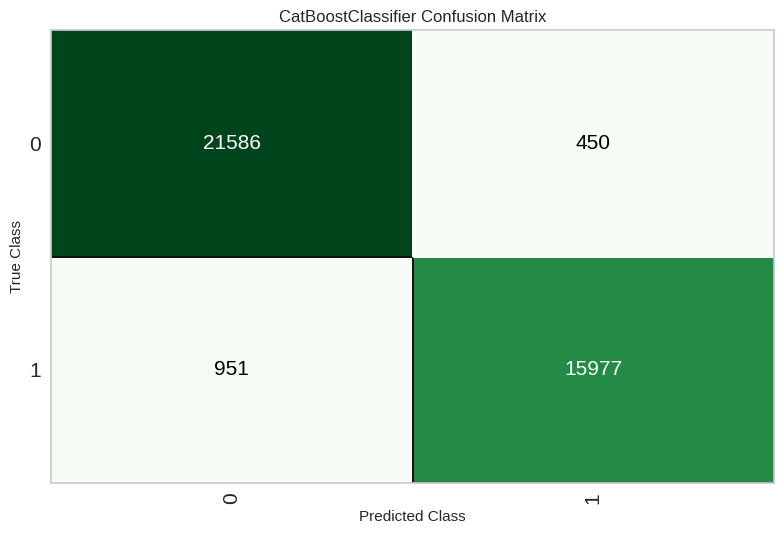

In [13]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

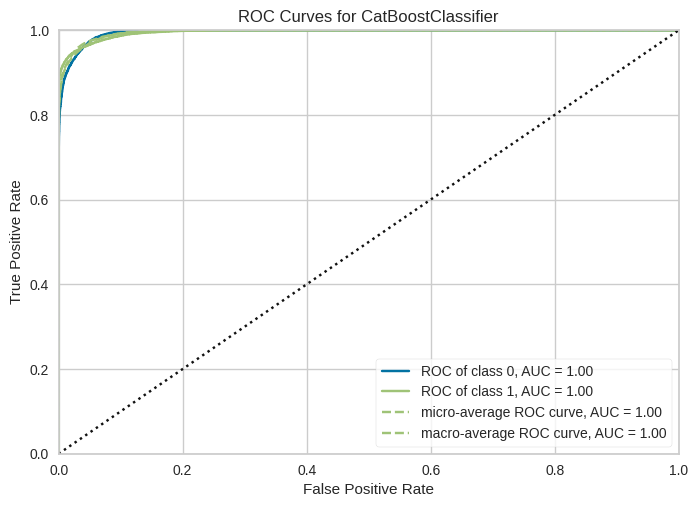

In [14]:
# plot AUC
plot_model(best, plot = 'auc')

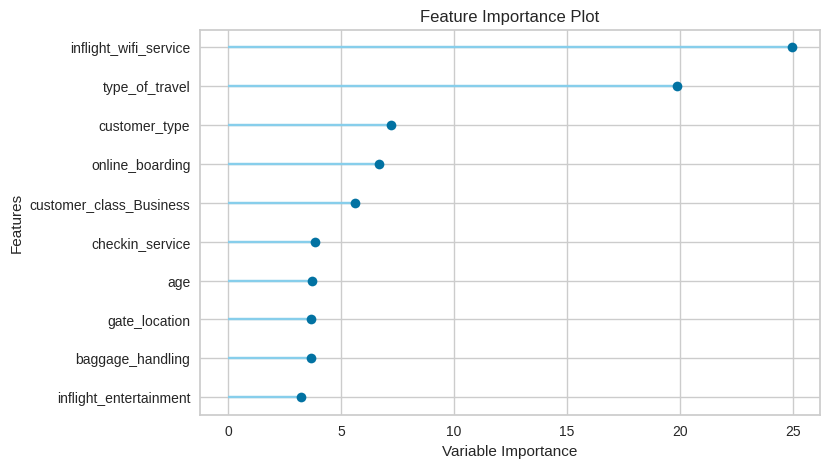

In [15]:
# plot feature importance
plot_model(best, plot = 'feature')

In [16]:
# check docstring to see available plots
# help(plot_model)

In [17]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9640,0.9954,0.9640,0.9642,0.9640,0.9266,0.9269


In [19]:
# show predictions df
holdout_pred.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,prediction_label,prediction_score
108600,108600,Male,disloyal Customer,24,Business travel,Business,338,0,5,0,...,3,5,4,4,3,22,46.0,satisfied,satisfied,0.9997
48591,48591,Female,Loyal Customer,8,Business travel,Business,910,4,4,4,...,1,4,3,4,4,0,19.0,neutral or dissatisfied,neutral or dissatisfied,0.6904
84518,84518,Male,Loyal Customer,51,Personal Travel,Eco,1005,4,4,4,...,4,1,1,1,5,0,0.0,neutral or dissatisfied,neutral or dissatisfied,0.6147
38314,38314,Female,Loyal Customer,26,Personal Travel,Eco,1609,1,2,2,...,5,4,1,3,5,0,1.0,neutral or dissatisfied,neutral or dissatisfied,0.9999
125100,125100,Female,Loyal Customer,45,Business travel,Business,2187,3,3,3,...,4,4,3,4,3,16,13.0,satisfied,satisfied,0.9996


In [20]:
# copy data and drop Class variable

new_data = my_df.copy()
new_data.drop('satisfaction', axis=1, inplace=True)
new_data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,25,18.0
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,1,6.0
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [21]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,prediction_label,prediction_score
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1.0000
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0.9999
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,0.9998
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0.9997
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,0.9992


In [22]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'age',
                                              'flight_distance',
                                              'inflight_wifi_service',
                                              'departure_arrival_time_convenient',
                                              'ease_of_online_booking',
                                              'gate_location', 'fo...
                                     transformer=OneHotEncoder(cols=['customer_class'],
                                                               drop_invariant=False,
                                                               handle_missing='

In [23]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Unnamed: 0', 'age',
                                             'flight_distance',
                                             'inflight_wifi_service',
                                             'departure_arrival_time_convenient',
                                             'ease_of_online_booking',
                                             'gate_lo...
                                    transformer=OneHotEncoder(cols=['customer_class'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7c2519347040>)],
         verbose=False)

In [24]:
# init setup function
s = setup(my_df, target = 'satisfaction', session_id = 123)

,Description,Value
0,Session id,123
1,Target,satisfaction
2,Target type,Binary
3,Target mapping,"neutral or dissatisfied: 0, satisfied: 1"
4,Original data shape,"(129880, 24)"
5,Transformed data shape,"(129880, 26)"
6,Transformed train set shape,"(90916, 26)"
7,Transformed test set shape,"(38964, 26)"
8,Numeric features,19
9,Categorical features,4


In [25]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [26]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Unnamed 0,Gender,customer_type,age,type_of_travel,customer_class_Eco,customer_class_Business,customer_class_Eco Plus,flight_distance,inflight_wifi_service,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
21897,21897.0,1.0,0.0,51.0,0.0,1.0,0.0,0.0,640.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,0.0,6.0
83358,83358.0,1.0,0.0,65.0,1.0,1.0,0.0,0.0,1037.0,3.0,...,1.0,4.0,3.0,1.0,3.0,1.0,3.0,4.0,0.0,0.0
53442,53442.0,0.0,0.0,21.0,1.0,1.0,0.0,0.0,356.0,2.0,...,4.0,4.0,5.0,3.0,3.0,1.0,5.0,4.0,0.0,0.0
34149,34149.0,0.0,1.0,21.0,0.0,1.0,0.0,0.0,89.0,1.0,...,1.0,1.0,3.0,2.0,4.0,2.0,3.0,1.0,0.0,0.0
25757,25757.0,1.0,0.0,23.0,1.0,1.0,0.0,0.0,501.0,4.0,...,4.0,5.0,5.0,4.0,5.0,3.0,5.0,5.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69625,69625.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,2917.0,3.0,...,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,0.0,0.0
117767,117767.0,0.0,0.0,62.0,0.0,1.0,0.0,0.0,424.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,0.0,0.0
8372,8372.0,1.0,0.0,28.0,1.0,1.0,0.0,0.0,280.0,1.0,...,1.0,1.0,3.0,4.0,5.0,5.0,5.0,1.0,0.0,0.0
88465,88465.0,1.0,0.0,21.0,1.0,1.0,0.0,0.0,836.0,2.0,...,5.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,18.0,0.0


In [27]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [29]:
# init setup with normalize = True

s = setup(my_df, target = 'satisfaction', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,satisfaction
2,Target type,Binary
3,Target mapping,"neutral or dissatisfied: 0, satisfied: 1"
4,Original data shape,"(129880, 24)"
5,Transformed data shape,"(129880, 26)"
6,Transformed train set shape,"(90916, 26)"
7,Transformed test set shape,"(38964, 26)"
8,Numeric features,19
9,Categorical features,4


<Axes: >

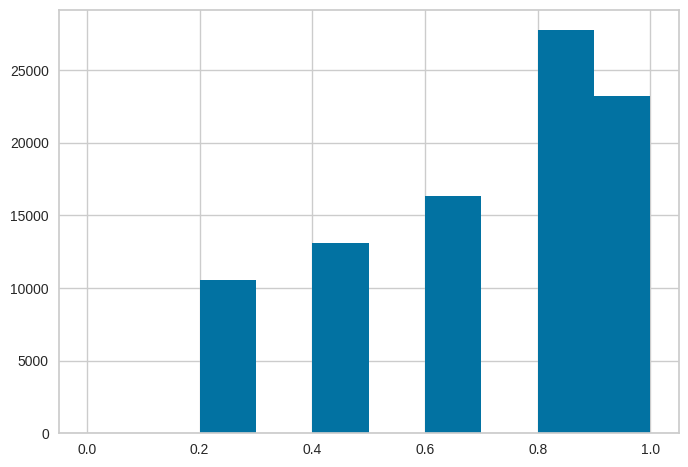

In [30]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['seat_comfort'].hist()

<Axes: >

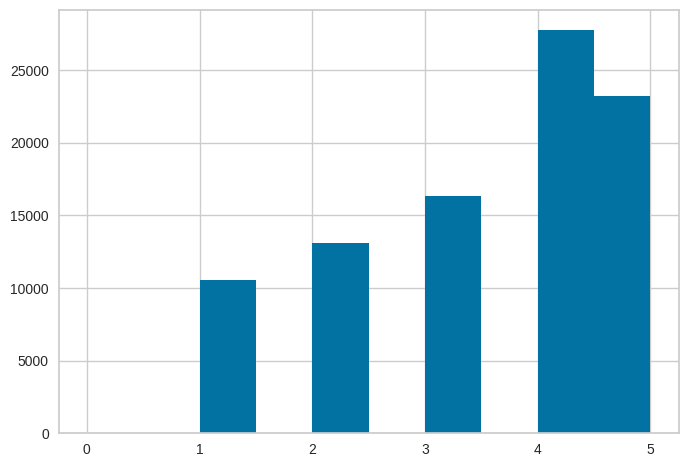

In [31]:
get_config('X_train')['seat_comfort'].hist()

In [32]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9646,0.9953,0.9646,0.9648,0.9646,0.9278,0.9281,28.4610
lightgbm,Light Gradient Boosting Machine,0.9640,0.9949,0.9640,0.9643,0.9639,0.9264,0.9268,5.3840
xgboost,Extreme Gradient Boosting,0.9630,0.9950,0.9630,0.9632,0.9630,0.9246,0.9248,1.9500
rf,Random Forest Classifier,0.9624,0.9939,0.9624,0.9626,0.9623,0.9231,0.9235,11.9070
et,Extra Trees Classifier,0.9614,0.9934,0.9614,0.9616,0.9613,0.9211,0.9215,8.1740
dt,Decision Tree Classifier,0.9445,0.9437,0.9445,0.9445,0.9445,0.8871,0.8871,1.4390
gbc,Gradient Boosting Classifier,0.9424,0.9876,0.9424,0.9425,0.9423,0.8825,0.8827,15.7790
ada,Ada Boost Classifier,0.9276,0.9779,0.9276,0.9276,0.9276,0.8525,0.8525,4.1250
knn,K Neighbors Classifier,0.9253,0.9664,0.9253,0.9267,0.9249,0.8467,0.8487,8.2100
svm,SVM - Linear Kernel,0.8748,0.9265,0.8748,0.8759,0.8740,0.7428,0.7451,1.1760


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [33]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [34]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9646,0.9953,0.9646,0.9648,0.9646,0.9278,0.9281,27.8730
lightgbm,Light Gradient Boosting Machine,0.9640,0.9949,0.9640,0.9643,0.9639,0.9264,0.9268,4.6300
xgboost,Extreme Gradient Boosting,0.9630,0.9950,0.9630,0.9632,0.9630,0.9246,0.9248,1.7990
rf,Random Forest Classifier,0.9624,0.9939,0.9624,0.9626,0.9623,0.9231,0.9235,11.6020
et,Extra Trees Classifier,0.9614,0.9934,0.9614,0.9616,0.9613,0.9211,0.9215,7.7890
dt,Decision Tree Classifier,0.9445,0.9437,0.9445,0.9445,0.9445,0.8871,0.8871,1.2780
gbc,Gradient Boosting Classifier,0.9424,0.9876,0.9424,0.9425,0.9423,0.8825,0.8827,15.9070


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [35]:
compare_tree_models

In [36]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9646,0.9953,0.9646,0.9648,0.9646,0.9278,0.9281,27.873
lightgbm,Light Gradient Boosting Machine,0.9640,0.9949,0.9640,0.9643,0.9639,0.9264,0.9268,4.630
xgboost,Extreme Gradient Boosting,0.9630,0.9950,0.9630,0.9632,0.9630,0.9246,0.9248,1.799
rf,Random Forest Classifier,0.9624,0.9939,0.9624,0.9626,0.9623,0.9231,0.9235,11.602
et,Extra Trees Classifier,0.9614,0.9934,0.9614,0.9616,0.9613,0.9211,0.9215,7.789
dt,Decision Tree Classifier,0.9445,0.9437,0.9445,0.9445,0.9445,0.8871,0.8871,1.278
gbc,Gradient Boosting Classifier,0.9424,0.9876,0.9424,0.9425,0.9423,0.8825,0.8827,15.907


In [37]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9646,0.9953,0.9646,0.9648,0.9646,0.9278,0.9281,27.7560
lightgbm,Light Gradient Boosting Machine,0.9640,0.9949,0.9640,0.9643,0.9639,0.9264,0.9268,4.3140
xgboost,Extreme Gradient Boosting,0.9630,0.9950,0.9630,0.9632,0.9630,0.9246,0.9248,1.8140
rf,Random Forest Classifier,0.9624,0.9939,0.9624,0.9626,0.9623,0.9231,0.9235,11.1250
et,Extra Trees Classifier,0.9614,0.9934,0.9614,0.9616,0.9613,0.9211,0.9215,7.9580
dt,Decision Tree Classifier,0.9445,0.9437,0.9445,0.9445,0.9445,0.8871,0.8871,1.3440
gbc,Gradient Boosting Classifier,0.9424,0.9876,0.9424,0.9425,0.9423,0.8825,0.8827,15.5610
ada,Ada Boost Classifier,0.9276,0.9779,0.9276,0.9276,0.9276,0.8525,0.8525,4.0030
knn,K Neighbors Classifier,0.9253,0.9664,0.9253,0.9267,0.9249,0.8467,0.8487,7.7520
svm,SVM - Linear Kernel,0.8748,0.9265,0.8748,0.8759,0.8740,0.7428,0.7451,0.8740


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [38]:
# list of top 3 models by Recall
best_recall_models_top3

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, 

In [40]:
# check available metrics used in CV
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7c2590e6b7f0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7c2590e6bb50>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7c2590e6bd90>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [41]:
# create a custom function
import numpy as np

def custom_metric(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (100), 0)
    fp = np.where((y_pred==1) & (y==0), -5, 0)
    return np.sum([tp,fp])

# add metric to PyCaret
add_metric('custom_metric', 'Custom Metric', custom_metric)

,custom_metric
Name,Custom Metric
Display Name,Custom Metric
Score Function,<pycaret.internal.metrics.EncodedDecodedLabels...
Scorer,"make_scorer(custom_metric, response_method='pr..."
Target,pred
Args,{}
Greater is Better,True
Multiclass,True
Custom,True


In [42]:
# now let's run compare_models again
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric,TT (Sec)
catboost,CatBoost Classifier,0.9646,0.9953,0.9646,0.9648,0.9646,0.9278,0.9281,0.0000,28.4950
lightgbm,Light Gradient Boosting Machine,0.9640,0.9949,0.9640,0.9643,0.9639,0.9264,0.9268,0.0000,4.1020
xgboost,Extreme Gradient Boosting,0.9630,0.9950,0.9630,0.9632,0.9630,0.9246,0.9248,0.0000,1.8220
rf,Random Forest Classifier,0.9624,0.9939,0.9624,0.9626,0.9623,0.9231,0.9235,0.0000,11.7840
et,Extra Trees Classifier,0.9614,0.9934,0.9614,0.9616,0.9613,0.9211,0.9215,0.0000,7.9500
dt,Decision Tree Classifier,0.9445,0.9437,0.9445,0.9445,0.9445,0.8871,0.8871,0.0000,1.4570
gbc,Gradient Boosting Classifier,0.9424,0.9876,0.9424,0.9425,0.9423,0.8825,0.8827,0.0000,15.6960
ada,Ada Boost Classifier,0.9276,0.9779,0.9276,0.9276,0.9276,0.8525,0.8525,0.0000,4.2080
knn,K Neighbors Classifier,0.9253,0.9664,0.9253,0.9267,0.9249,0.8467,0.8487,0.0000,8.0670
svm,SVM - Linear Kernel,0.8748,0.9265,0.8748,0.8759,0.8740,0.7428,0.7451,0.0000,1.1080


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [43]:
# remove custom metric
remove_metric('custom_metric')

In [48]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [49]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8732,0.9257,0.8732,0.8730,0.8729,0.7408,0.7412
1,0.8797,0.9282,0.8797,0.8796,0.8793,0.7539,0.7545
2,0.8769,0.9281,0.8769,0.8769,0.8766,0.7482,0.7488
3,0.8782,0.9305,0.8782,0.8781,0.8780,0.7512,0.7516
4,0.8745,0.9304,0.8745,0.8743,0.8744,0.7440,0.7442
5,0.8752,0.9263,0.8752,0.8750,0.8749,0.7449,0.7453
6,0.8736,0.9220,0.8736,0.8736,0.8732,0.7413,0.7420
7,0.8725,0.9265,0.8725,0.8724,0.8722,0.7393,0.7398
8,0.8716,0.9241,0.8716,0.8714,0.8714,0.7378,0.7381


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8732,0.9257,0.8732,0.8730,0.8729,0.7408,0.7412
1,0.8797,0.9282,0.8797,0.8796,0.8793,0.7539,0.7545
2,0.8769,0.9281,0.8769,0.8769,0.8766,0.7482,0.7488
3,0.8782,0.9305,0.8782,0.8781,0.8780,0.7512,0.7516
4,0.8745,0.9304,0.8745,0.8743,0.8744,0.7440,0.7442
5,0.8752,0.9263,0.8752,0.8750,0.8749,0.7449,0.7453
6,0.8736,0.9220,0.8736,0.8736,0.8732,0.7413,0.7420
7,0.8725,0.9265,0.8725,0.8724,0.8722,0.7393,0.7398
8,0.8716,0.9241,0.8716,0.8714,0.8714,0.7378,0.7381


In [51]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8774,0.9282,0.8774,0.8773,0.8770,0.7492,0.7497
1,0.8751,0.9272,0.8751,0.8749,0.8748,0.7448,0.7451
2,0.8708,0.9238,0.8708,0.8707,0.8705,0.7360,0.7364
Mean,0.8744,0.9264,0.8744,0.8743,0.8741,0.7433,0.7438
Std,0.0027,0.0019,0.0027,0.0027,0.0027,0.0055,0.0055


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8733,0.9258,0.8733,0.8732,0.8730,0.7410,0.7414
1,0.8801,0.9282,0.8801,0.8801,0.8798,0.7548,0.7554
2,0.8768,0.9281,0.8768,0.8768,0.8764,0.7480,0.7486
3,0.8785,0.9306,0.8785,0.8783,0.8782,0.7517,0.7520
4,0.8748,0.9304,0.8748,0.8747,0.8747,0.7447,0.7448
5,0.8752,0.9263,0.8752,0.8750,0.8749,0.7449,0.7453
6,0.8738,0.9220,0.8738,0.8738,0.8734,0.7418,0.7425
7,0.8730,0.9265,0.8730,0.8728,0.8726,0.7402,0.7407
8,0.8720,0.9241,0.8720,0.8718,0.8717,0.7385,0.7388


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# change the probability threshold of classifier from 0.5 to 0.66
create_model('lr', probability_threshold = 0.66)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8719,0.9257,0.8719,0.8781,0.8698,0.7339,0.7429
1,0.8760,0.9282,0.8760,0.8830,0.8740,0.7425,0.7521
2,0.8707,0.9281,0.8707,0.8779,0.8684,0.7311,0.7413
3,0.8716,0.9305,0.8716,0.8783,0.8695,0.7334,0.7428
4,0.8712,0.9304,0.8712,0.8773,0.8692,0.7326,0.7414
5,0.8722,0.9263,0.8722,0.8782,0.8702,0.7347,0.7434
6,0.8722,0.9220,0.8722,0.8788,0.8701,0.7345,0.7439
7,0.8712,0.9265,0.8712,0.8779,0.8690,0.7324,0.7419
8,0.8677,0.9241,0.8677,0.8728,0.8657,0.7256,0.7333


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=123,
                                                                   solver='lbfgs',
                                                                   tol=0.0001,
                                                                   verbose=0,
                                                                   warm_start=False),
                                     dual=False, fit_intercept=True,
                                     intercept_scaling=1, l1_ratio=None,
                                     max_iter=1000, multi_class='auto',
                                     n_jobs=None, penalty='l2',
                                     probability_threshold=0.66,
                                     random_state=123, solver='lbfgs',
                                     tol=0.0001, verbose=0, warm_start=False)

In [56]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9438,0.9430,0.9438,0.9438,0.9438,0.8857,0.8857
1,0.9447,0.9437,0.9447,0.9447,0.9447,0.8874,0.8874
2,0.9449,0.9444,0.9449,0.9450,0.9449,0.8880,0.8880
3,0.9432,0.9429,0.9432,0.9434,0.9433,0.8847,0.8847
4,0.9456,0.9450,0.9456,0.9456,0.9456,0.8893,0.8893
5,0.9442,0.9432,0.9442,0.9442,0.9442,0.8865,0.8865
6,0.9467,0.9458,0.9467,0.9467,0.9467,0.8915,0.8915
7,0.9402,0.9394,0.9402,0.9402,0.9402,0.8783,0.8783
8,0.9467,0.9459,0.9467,0.9467,0.9467,0.8915,0.8915


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9302,0.9677,0.9302,0.9303,0.9300,0.8573,0.8577
1,0.9319,0.9683,0.9319,0.9321,0.9317,0.8608,0.8613
2,0.9299,0.9690,0.9299,0.9303,0.9297,0.8567,0.8574
3,0.9276,0.9648,0.9276,0.9277,0.9275,0.8521,0.8525
4,0.9283,0.9621,0.9283,0.9283,0.9282,0.8536,0.8539
5,0.9234,0.9644,0.9234,0.9236,0.9233,0.8436,0.8440
6,0.9264,0.9670,0.9264,0.9264,0.9263,0.8497,0.8500
7,0.9247,0.9622,0.9247,0.9249,0.9244,0.8459,0.8465
8,0.9284,0.9662,0.9284,0.9284,0.9283,0.8538,0.8541


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [58]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [59]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9807,0.9474,0.9477,0.9473,0.8925,0.8930
1,0.9508,0.9833,0.9508,0.9511,0.9507,0.8995,0.9000
2,0.9485,0.9810,0.9485,0.9488,0.9484,0.8948,0.8953
3,0.9523,0.9837,0.9523,0.9524,0.9522,0.9026,0.9028
4,0.9508,0.9839,0.9508,0.9510,0.9507,0.8996,0.8999
5,0.9487,0.9809,0.9487,0.9489,0.9487,0.8953,0.8956
6,0.9522,0.9833,0.9522,0.9523,0.9521,0.9023,0.9026
7,0.9487,0.9812,0.9487,0.9488,0.9487,0.8954,0.8956
8,0.9489,0.9777,0.9489,0.9489,0.9488,0.8956,0.8958


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [60]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9302,0.9677,0.9302,0.9303,0.9300,0.8573,0.8577
1,0.9319,0.9683,0.9319,0.9321,0.9317,0.8608,0.8613
2,0.9299,0.9690,0.9299,0.9303,0.9297,0.8567,0.8574
3,0.9276,0.9648,0.9276,0.9277,0.9275,0.8521,0.8525
4,0.9283,0.9621,0.9283,0.9283,0.9282,0.8536,0.8539
5,0.9234,0.9644,0.9234,0.9236,0.9233,0.8436,0.8440
6,0.9264,0.9670,0.9264,0.9264,0.9263,0.8497,0.8500
7,0.9247,0.9622,0.9247,0.9249,0.9244,0.8459,0.8465
8,0.9284,0.9662,0.9284,0.9284,0.9283,0.8538,0.8541


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [61]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [62]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Unnamed: '
                                                                          '0',
                                                                          'age',
                                                                          'flight_dis...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [63]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9503,0.9817,0.9503,0.9504,0.9502,0.8985,0.8988
1,0.9528,0.9836,0.9528,0.9529,0.9527,0.9037,0.9039
2,0.9522,0.9831,0.9522,0.9522,0.9521,0.9024,0.9026
3,0.9560,0.9858,0.9560,0.9561,0.9559,0.9103,0.9104
4,0.9553,0.9857,0.9553,0.9554,0.9553,0.9089,0.9091
5,0.9496,0.9826,0.9496,0.9498,0.9495,0.8971,0.8975
6,0.9527,0.9817,0.9527,0.9527,0.9526,0.9035,0.9037
7,0.9511,0.9829,0.9511,0.9513,0.9509,0.9000,0.9004
8,0.9534,0.9823,0.9534,0.9537,0.9532,0.9047,0.9052


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 90916 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


In [65]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9559,0.9884,0.9559,0.9561,0.9558,0.9099,0.9103
1,0.9582,0.9897,0.9582,0.9585,0.9581,0.9146,0.9151
2,0.9614,0.9896,0.9614,0.9617,0.9613,0.9211,0.9216
3,0.9596,0.9901,0.9596,0.9598,0.9596,0.9176,0.9179
4,0.9628,0.9910,0.9628,0.9631,0.9627,0.9240,0.9245
5,0.9582,0.9900,0.9582,0.9586,0.9581,0.9146,0.9151
6,0.9599,0.9890,0.9599,0.9601,0.9598,0.9180,0.9184
7,0.9553,0.9887,0.9553,0.9557,0.9552,0.9087,0.9092
8,0.9604,0.9893,0.9604,0.9606,0.9603,0.9191,0.9195


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [66]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9426,0.9418,0.9426,0.9426,0.9426,0.8832,0.8832
1,0.9435,0.9427,0.9435,0.9435,0.9435,0.8850,0.8850
2,0.9463,0.9456,0.9463,0.9463,0.9463,0.8908,0.8908
3,0.9438,0.9436,0.9438,0.9439,0.9438,0.8858,0.8859
4,0.9457,0.9454,0.9457,0.9458,0.9457,0.8896,0.8896
5,0.9437,0.9427,0.9437,0.9437,0.9437,0.8854,0.8854
6,0.9460,0.9450,0.9460,0.9460,0.9460,0.8901,0.8901
7,0.9415,0.9410,0.9415,0.9416,0.9415,0.8810,0.8811
8,0.9458,0.9448,0.9458,0.9458,0.9458,0.8897,0.8897


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [68]:
# top 3 models based on recall
best_recall_models_top3

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, 

In [69]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.9951,0.9630,0.9633,0.9630,0.9245,0.9249
1,0.9655,0.9956,0.9655,0.9658,0.9654,0.9294,0.9299
2,0.9666,0.9955,0.9666,0.9669,0.9665,0.9317,0.9321
3,0.9665,0.9958,0.9665,0.9666,0.9664,0.9315,0.9318
4,0.9661,0.9960,0.9661,0.9663,0.9661,0.9309,0.9311
5,0.9647,0.9954,0.9647,0.9650,0.9646,0.9279,0.9283
6,0.9638,0.9947,0.9638,0.9641,0.9637,0.9261,0.9265
7,0.9623,0.9946,0.9623,0.9625,0.9622,0.9229,0.9233
8,0.9670,0.9955,0.9670,0.9671,0.9669,0.9326,0.9329


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7c2516742170>),
                             ('Light Gradient Boosting Machine',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='binary:logistic', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [71]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9629,0.9951,0.9629,0.9631,0.9629,0.9244,0.9246
1,0.9656,0.9956,0.9656,0.9658,0.9655,0.9297,0.9301
2,0.9669,0.9954,0.9669,0.9671,0.9668,0.9324,0.9327
3,0.9668,0.9958,0.9668,0.9668,0.9667,0.9323,0.9324
4,0.9665,0.9960,0.9665,0.9665,0.9664,0.9316,0.9317
5,0.9651,0.9954,0.9651,0.9653,0.9651,0.9288,0.9291
6,0.9638,0.9947,0.9638,0.9640,0.9637,0.9261,0.9264
7,0.9619,0.9945,0.9619,0.9621,0.9619,0.9223,0.9226
8,0.9660,0.9955,0.9660,0.9661,0.9660,0.9307,0.9308


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('CatBoost Classifier',
                                <catboost.core.CatBoostClassifier object at 0x7c25193e39d0>),
                               ('Light Gradient Boosting Machine',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimat...
                                              num_parallel_tree=None,
                                              objective='binary:logistic', ...))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

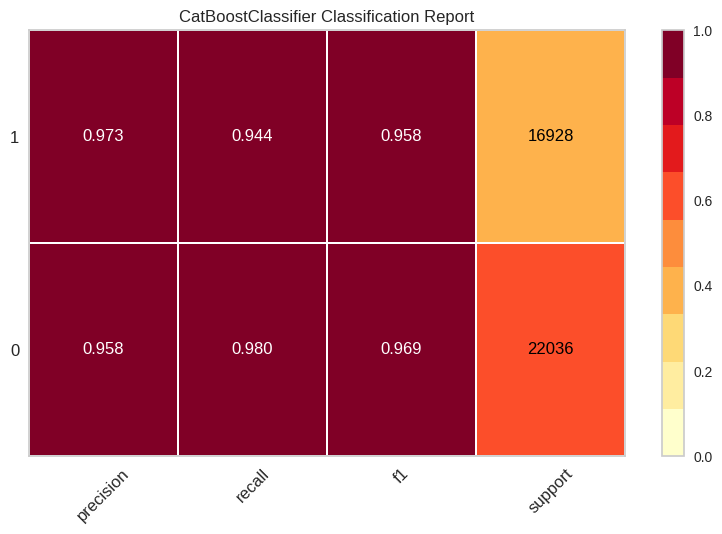

In [73]:
# plot class report
plot_model(best, plot = 'class_report')

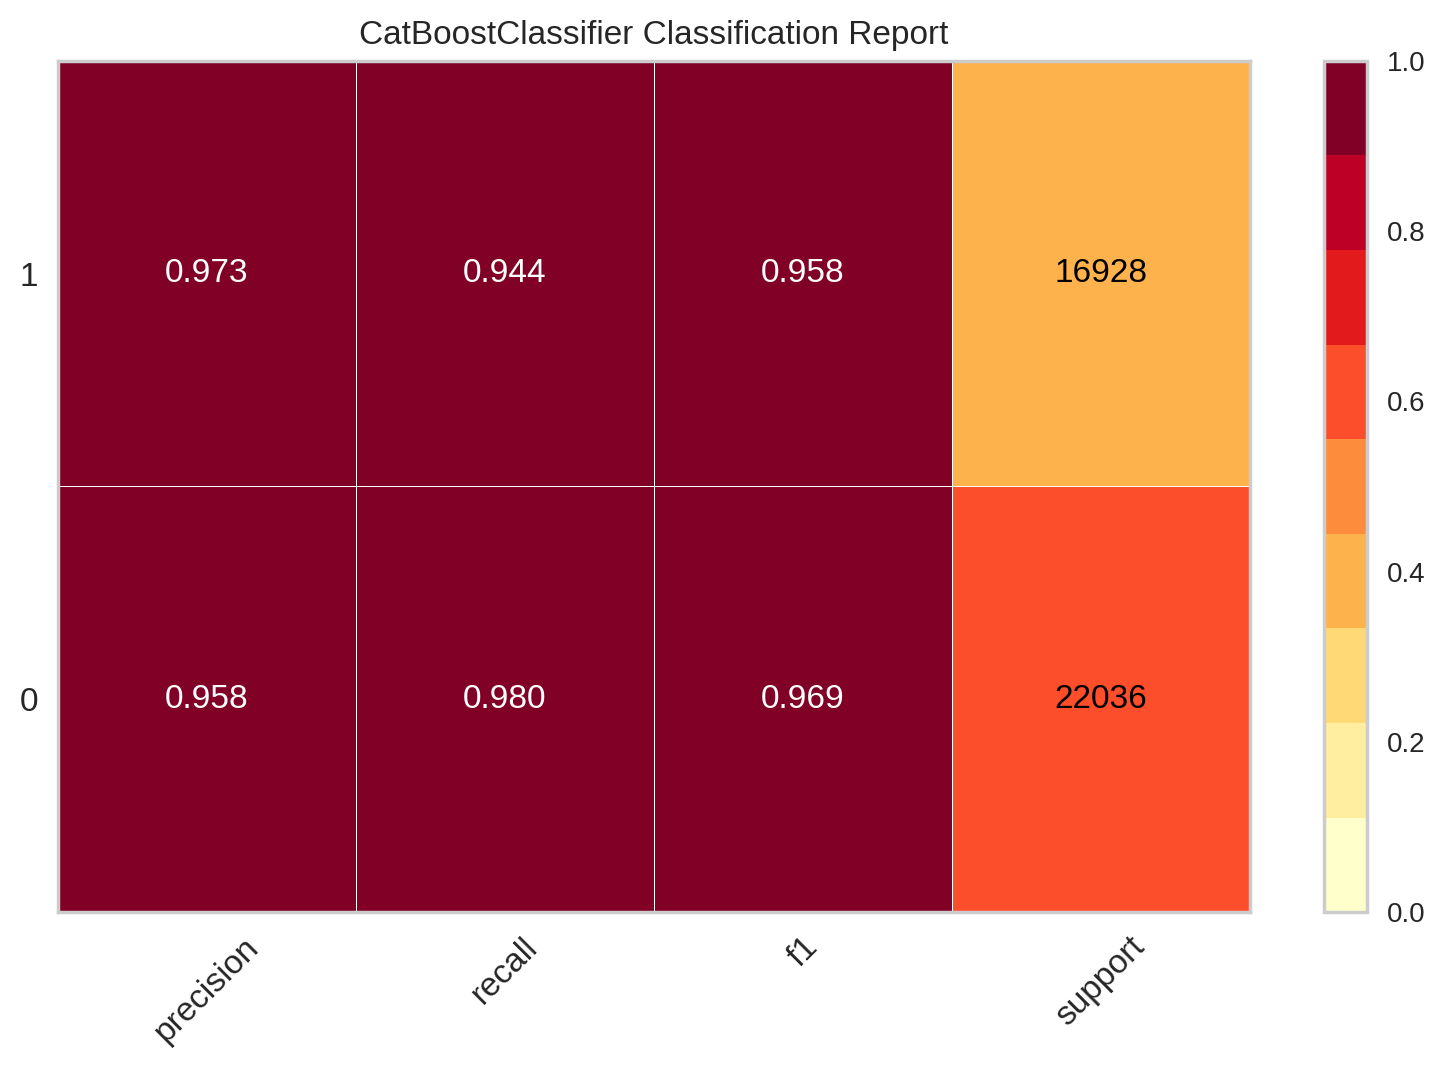

In [74]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [75]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

In [77]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9637,0.9948,0.9637,0.9640,0.9636,0.9258,0.9263
1,0.9640,0.9953,0.9640,0.9645,0.9639,0.9265,0.9271
2,0.9651,0.9949,0.9651,0.9655,0.9650,0.9287,0.9293
3,0.9655,0.9954,0.9655,0.9656,0.9654,0.9295,0.9298
4,0.9662,0.9956,0.9662,0.9665,0.9662,0.9310,0.9314
5,0.9640,0.9949,0.9640,0.9644,0.9639,0.9265,0.9270
6,0.9615,0.9941,0.9615,0.9617,0.9614,0.9214,0.9217
7,0.9597,0.9940,0.9597,0.9601,0.9596,0.9177,0.9182
8,0.9651,0.9951,0.9651,0.9653,0.9651,0.9288,0.9291


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

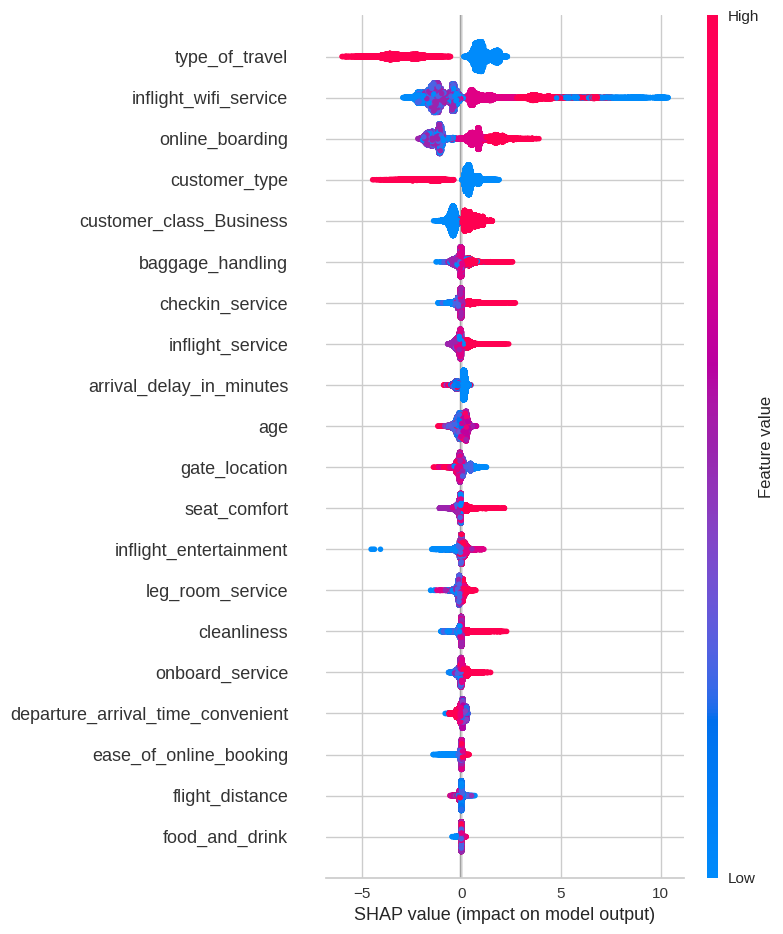

In [78]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [79]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [80]:
# help(interpret_model)

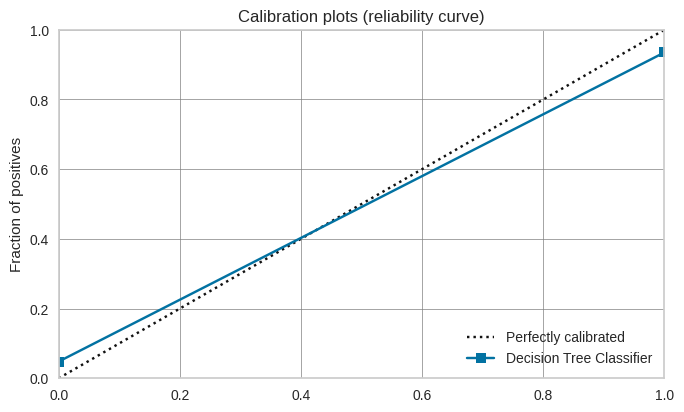

In [81]:
# check calbiration of default dt
plot_model(dt, plot = 'calibration')

In [82]:
# calibrate default dt
calibrated_dt = calibrate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9523,0.9818,0.9523,0.9523,0.9523,0.9028,0.9028
1,0.9530,0.9828,0.9530,0.9530,0.9530,0.9043,0.9043
2,0.9559,0.9839,0.9559,0.9559,0.9559,0.9101,0.9102
3,0.9536,0.9840,0.9536,0.9536,0.9536,0.9054,0.9055
4,0.9575,0.9847,0.9575,0.9575,0.9575,0.9135,0.9136
5,0.9549,0.9825,0.9549,0.9549,0.9549,0.9081,0.9082
6,0.9563,0.9843,0.9563,0.9564,0.9563,0.9109,0.9111
7,0.9504,0.9808,0.9504,0.9504,0.9504,0.8989,0.8990
8,0.9574,0.9827,0.9574,0.9574,0.9574,0.9132,0.9133


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

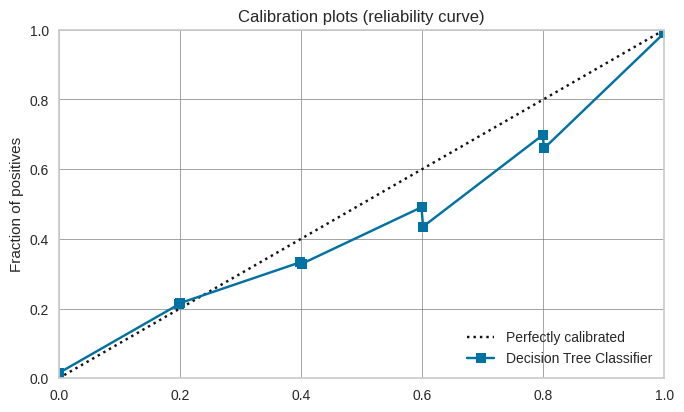

In [83]:
# check calbiration of calibrated dt
plot_model(calibrated_dt, plot = 'calibration')

In [84]:
# help(calibrate_model)

In [90]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/76 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric
Index,,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.8742,0.9264,0.8742,0.8741,0.8739,0.7429,0.7433,NaN
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9253,0.9664,0.9253,0.9267,0.9249,0.8467,0.8487,NaN
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.8486,0.9141,0.8486,0.8483,0.8483,0.6906,0.6910,NaN
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9445,0.9437,0.9445,0.9445,0.9445,0.8871,0.8871,NaN
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.8748,0.9265,0.8748,0.8759,0.8740,0.7428,0.7451,NaN
...,...,...,...,...,...,...,...,...,...,...
70,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9444,0.9437,0.9444,0.9444,0.9444,0.8869,0.8869,NaN
71,Voting Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9652,0.9954,0.9652,0.9654,0.9651,0.9289,0.9293,NaN
72,Stacking Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9652,0.9954,0.9652,0.9653,0.9651,0.9290,0.9292,NaN


In [92]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Unnamed: 0', 'age',
                                             'flight_distance',
                                             'inflight_wifi_service',
                                             'departure_arrival_time_convenient',
                                             'ease_of_online_booking',
                                             'gate_location', 'fo...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             objective='binary:logistic', ...))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None)]],
         verbose=False)

In [94]:
automl()

VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7c258fb32680>),
                             ('Light Gradient Boosting Machine',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='binary:logistic', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9640,0.9954,0.9640,0.9642,0.9640,0.9266,0.9269


,Samples,Accuracy,Recall,Precision,F1,Kappa,MCC,Selection Rate
seat_comfort,,,,,,,,
1,4558,0.959851,0.959851,0.959443,0.959379,0.880695,0.881439,0.0
2,5464,0.955344,0.955344,0.954848,0.954753,0.868018,0.868959,0.0
3,7015,0.953956,0.953956,0.953537,0.952998,0.857851,0.859959,0.0
4,11998,0.965244,0.965244,0.96546,0.965277,0.929672,0.929818,0.0
5,9929,0.976433,0.976433,0.976737,0.976501,0.948221,0.948401,0.0


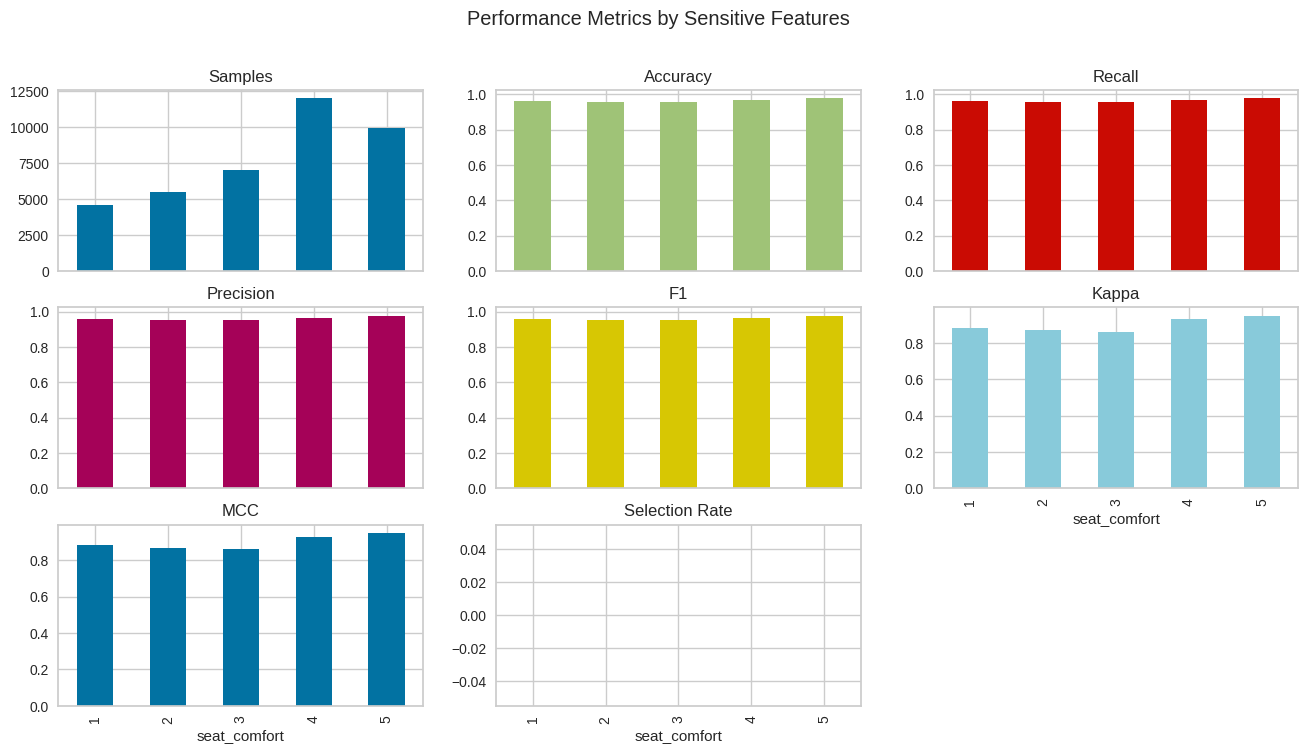

In [95]:
# check fairness
check_fairness(best, sensitive_features = ['seat_comfort'])